In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.linear_model
import numpy
import pandas
import statsmodels.api
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

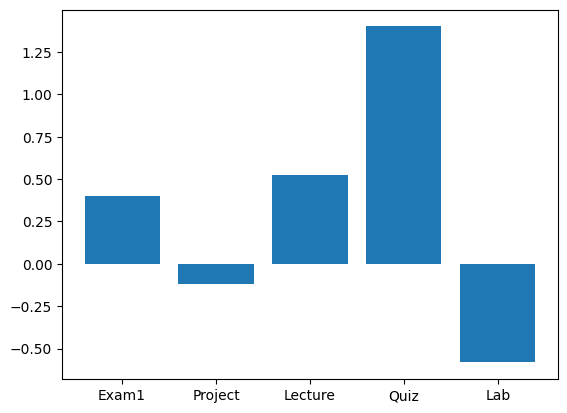

In [2]:
# Read the data and plot the regression coefficients
data = pandas.read_csv("NewGrades.csv")
features = ["Exam1", "Project", "Lecture", "Quiz", "Lab"]
x = data[features]
y = data["Exam2"]
reg = sklearn.linear_model.LinearRegression()
reg.fit(x, y)
plt.bar(features, reg.coef_)

In [3]:
# Compute the score R^2 and adj R^2 of the regression
r2 = reg.score(x, y)
[r2, 1 - (1 - r2) * (len(y) - 1) / (len(y) - 5 - 1)]

[0.42000633317727665, 0.4119508655825166]

In [4]:
# Manually compute the score using the formula
y_pred = reg.predict(x)
y_bar = numpy.mean(y)
(sum((y_pred - y_bar) ** 2)) / (sum((y - y_bar) ** 2))

0.42000633317727676

<BarContainer object of 5 artists>

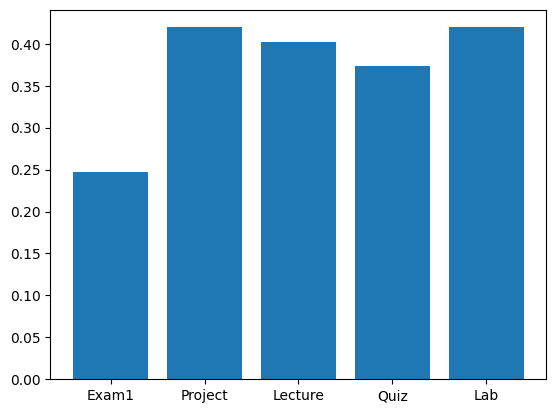

In [5]:
# Remove one column and run the regression and compare the scores
scores = []
for col in x:
    xi = x.drop(col, axis = 1)
    reg.fit(xi, y)
    scores.append(reg.score(xi, y))
plt.bar(features, scores)

In [6]:
# Use statsmodel for the comparison (not required for P6)
model = statsmodels.api.OLS(y, statsmodels.api.add_constant(x)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Exam2   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     52.14
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.32e-40
Time:                        22:08:41   Log-Likelihood:                -847.96
No. Observations:                 366   AIC:                             1708.
Df Residuals:                     360   BIC:                             1731.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6815      2.833     -1.653      0.0